# Import libs that we'll need for the project: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import percentile
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime
import matplotlib.dates as mdates
import operator
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from funcs import * 

In [2]:
# This is just to ignore warnings 

# Split the project into steps

1. Read the file
2. Remove Outliers  
   1. Quartiles
   2. Deviation 
   3. By hand in special cases 
3. Normalization and standardization of the data
   1. Z-Score
   2. Min Max
4. Split the data into train, test and validation sets
5. Train the NN
6. Adjust parameters

## Read the file and analyze data:

In [3]:



data_df = pd.read_csv("Proj1_Dataset.csv", sep=",", decimal=".")

data_df=parse_date_time(data_df)

data_df.to_csv("Proj1_Dataset_changed.csv")

#plot_data(data_df, temperature=True, CO2=True, PIR=True, light=True)

#scatter_plot(data_df, temperature=False, C02_PIR=False, light=False)




# Remove Outliers and Interpolate data


In [4]:

print(data_df.describe())


             S1Temp        S2Temp        S3Temp       S1Light       S2Light  \
count  10128.000000  10127.000000  10129.000000  10129.000000  10129.000000   
mean      20.424883     20.553337     20.003294     62.218185     58.250864   
std        0.415856      0.663691      0.543616    131.357611    142.220513   
min        0.000000     19.660000    -12.320000      0.000000      0.000000   
25%       20.130000     20.140000     19.650000      0.000000      0.000000   
50%       20.330000     20.340000     19.910000      0.000000      0.000000   
75%       20.672500     20.700000     20.310000     28.000000     30.000000   
max       21.380000     24.000000     21.180000   5500.000000    516.000000   

            S3Light           CO2          PIR1          PIR2       Persons  
count  10129.000000  10128.000000  10129.000000  10129.000000  10129.000000  
mean      80.774706    474.081754      0.107612      0.094382      0.452068  
std      661.501771    204.196690      0.309905      0

While using ´describe()´ we realized the following:

- The dataframe is 10129 rows long and some values return a count of, for example, 10127 rows, therefore we need to fill in the data where this values are missing 
- If we look closely to the mean and max values of each collumn we realize that there are some outliers due to the discrepancy of the values. Due to the ammount of data we'll simply drop the entire row where the value is found. 



### Drop Outliners

In [5]:


data_df = drop_outliners(data_df, threshold=6,
                         collumn_to_remove_outliers=
                         ["S1Temp", "S2Temp","S3Temp",
                          "CO2","PIR1", "PIR2","S1Light",
                           "S2Light","S3Light"])


#plot_data(data_df, temperature=True, CO2=True, PIR=True, light=True)

Removed outlined from index  56 from  S1Temp with value of: 0.0
Removed outlined from index  1188 from  S3Temp with value of: -12.32
Removed outlined from index  3760 from  S1Light with value of: 5500
Removed outlined from index  2800 from  S3Light with value of: 65536


### Interpolate NaN

In [6]:

# interpolate NaN values
data_df = data_df.interpolate(method='linear', limit_direction='forward', axis=0)



# Normalize data 

In [7]:
# Normalize data with Min Max 

#plot_data(data_df, temperature=True, CO2=True, PIR=True, light=True)

# split into train and test sets
from sklearn.model_selection import train_test_split

# split into train and test sets
train, test = train_test_split(data_df, test_size=0.3, shuffle=False)
test, val = train_test_split(test, test_size=0.3, shuffle=False)
# split into input and ou
y_train_df = train['Persons']
x_train_df = train.drop(['Persons'], axis=1)
y_test_df = test['Persons']
x_test_df = test.drop(['Persons'], axis=1)      
y_val_df = val['Persons']
x_val_df = val.drop(['Persons'], axis=1)


x_train_df, x_train_df_min, x_train_df_max = normalize_train_set(x_train_df)
x_test_df = normalize_test_set(x_test_df, x_train_df_min, x_train_df_max)
x_val_df = normalize_test_set(x_val_df, x_train_df_min, x_train_df_max)
#plot_data(x_test_df, temperature=True, CO2=True, light=True)



/home/lima/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


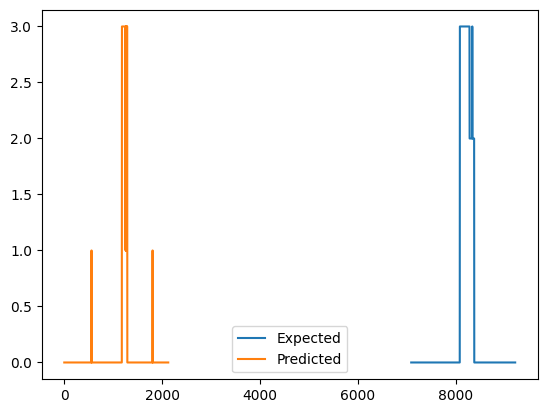

/home/lima/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lima/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lima/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lima/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/lima/.local/lib/python3.10/site-packages/sklearn/n

In [8]:
# Train scikit NN
from unittest import result
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# define model
#Config: {'activation': 'relu', 'hidden_layer_sizes': (30, 70), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'max_iter': 30, 'solver': 'sgd'}
model = MLPClassifier(random_state=21)

# fit model ignoring DateTime column
#drop DateTime column
x_train_df = x_train_df.drop(['DateTime'], axis=1)
x_test_df = x_test_df.drop(['DateTime'], axis=1)
model.fit(x_train_df, y_train_df)

# make a prediction
y_pred = model.predict(x_test_df)


# plot expected vs preducted
plt.plot(y_test_df, label='Expected')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


#cross val score

# find best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# define model
model = MLPClassifier()

# define model evaluation method
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=21)

# define grid
grid = dict()
grid['hidden_layer_sizes'] = [(6,5,3),(2,2,2),(3,3,3)]
grid['activation'] = ['relu', 'logistic','tanh']
grid['solver'] = ['adam', 'sgd']
grid['learning_rate'] = ['constant', 'adaptive']
grid['learning_rate_init'] = [0.001,0.01,0.1]
grid['max_iter'] = [300,500,1000]


# define search """ 'f1','precision' ,"""
search = GridSearchCV(model, grid, scoring='f1_macro', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(x_train_df, y_train_df)

# summarize



print('Score: ', results.best_score_ )
print('Config: %s' % results.best_params_)
# plot expected vs results




